In [1]:
import os
root_dir = ""
root_dir = os.getcwd()

In [2]:
code_dir = root_dir + "/" + "Fortran_Code/Section_Examples_Sine_Wave"

In [3]:
os.chdir(code_dir)

In [4]:
build_status = os.system("fpm build 2>/dev/null")

In [5]:
exec_status = \
    os.system("fpm run 2>/dev/null")

 [*] Opening the CSV file...
 [*] Adding header to the CSV file...
[*] Creating Sine Wave Testing Data
 [*] Creating the Neural Network...
Layer: input
------------------------------------------------------------
Output shape: 1
Parameters: 0

Layer: dense
------------------------------------------------------------
Input shape: 1
Output shape: 10
Parameters: 20
Activation: sigmoid

Layer: dense
------------------------------------------------------------
Input shape: 10
Output shape: 10
Parameters: 110
Activation: sigmoid

Layer: dense
------------------------------------------------------------
Input shape: 10
Output shape: 1
Parameters: 11
Activation: sigmoid


 [*] Training the Neural Network...


Iteration:  10000 | MSE:  0.006610


Iteration:  20000 | MSE:  0.000172


Iteration:  30000 | MSE:  0.000130


Iteration:  40000 | MSE:  0.000111


Iteration:  50000 | MSE:  0.000100


Iteration:  60000 | MSE:  0.000089


Iteration:  70000 | MSE:  0.000080


Iteration:  80000 | MSE:  0.000072


Iteration:  90000 | MSE:  0.000063


Iteration: 100000 | MSE:  0.000056
 [*] Training complete!
 [*] Saving data to the CSV file...
 [*] Closing the CSV file...


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
csv_file = "sine_NN_data.csv"
df = pd.read_csv(csv_file, header=0, names=[
        "Iteration", "x_test", "y_test", "x_train", "y_train", "y_pred", "MSE"
    ])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Iteration  int64  
 1   x_test     float64
 2   y_test     float64
 3   x_train    float64
 4   y_train    float64
 5   y_pred     float64
 6   MSE        float64
dtypes: float64(6), int64(1)
memory usage: 267.0 MB


In [8]:
grouped = df.groupby("Iteration")
mse_by_iter = grouped["MSE"].mean()
overall_mse = mse_by_iter.mean()
print(f"Overall Mean Squared Error: {overall_mse}")

Overall Mean Squared Error: 0.0012690667499999997


In [9]:
iteration_step = 5000 # Plot every iteration_step iteration
iteration_list = mse_by_iter.index.to_list()
iterations_to_plot = [1] + list(range(iteration_step, iteration_list[-1]+1, iteration_step))

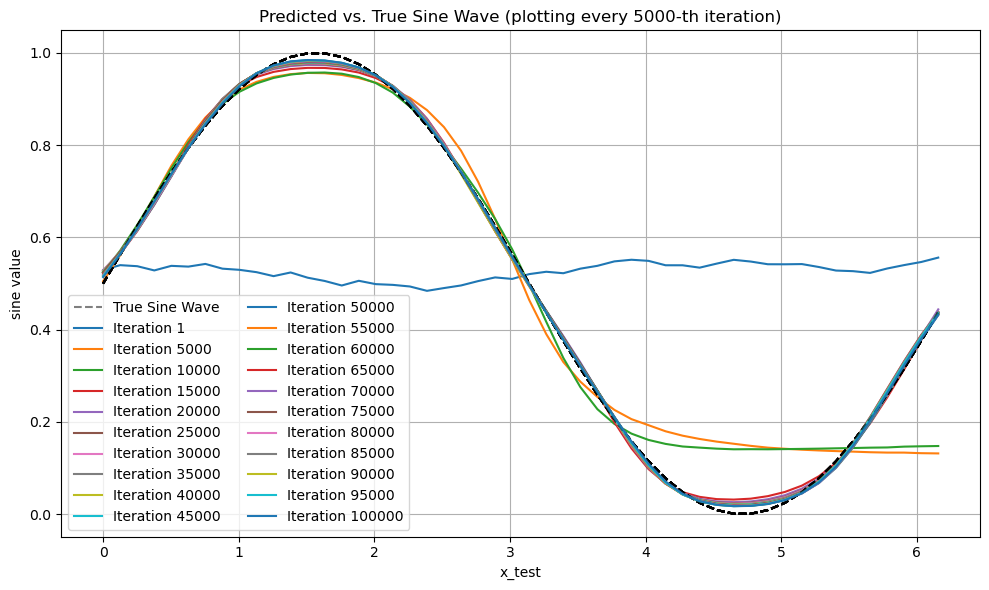

In [10]:
plt.figure(figsize=(10, 6))
for iteration in iterations_to_plot:
    group_df = grouped.get_group(iteration)

    plt.plot(group_df["x_test"], group_df["y_test"], 'k--', alpha=0.5,
                 label="True Sine Wave")
    plt.plot(group_df["x_test"], group_df["y_pred"], label=f"Iteration {iteration}")

plt.xlabel("x_test")
plt.ylabel("sine value")
plt.title(f"Predicted vs. True Sine Wave (plotting every {iteration_step}-th iteration)")
# Avoid repeated legend entries for the 'True Sine' if multiple lines are drawn
handles, labels = plt.gca().get_legend_handles_labels()
# Filter out duplicates by building an ordered dictionary
from collections import OrderedDict
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="lower left", ncol=2)

plt.grid(True)
plt.tight_layout()
plt.show()

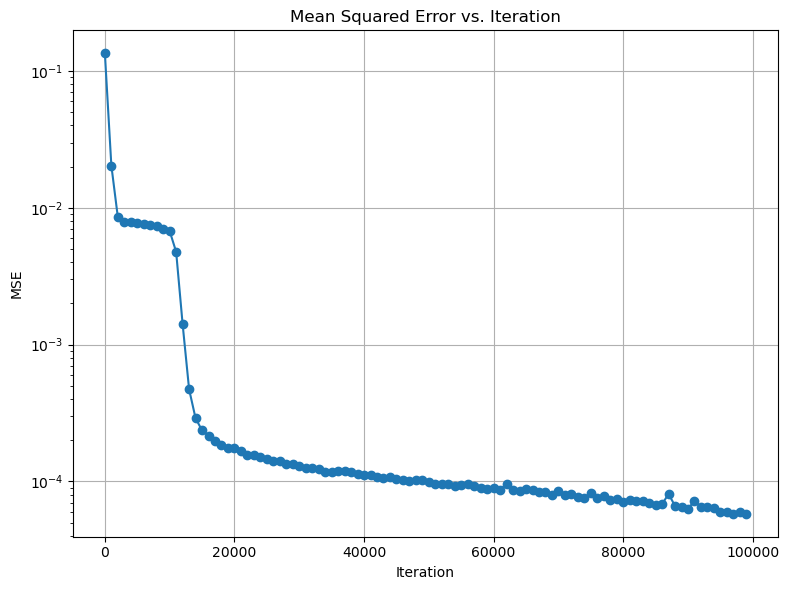

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(mse_by_iter.index[::1000], mse_by_iter.values[::1000], marker='o')
plt.title("Mean Squared Error vs. Iteration")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.tight_layout()
plt.yscale("log")
plt.show()